# **Regressão**

Objetivo: prever uma variável resposta (numérica e contínua) com base em uma ou mais variáveis preditoras. Em outras palavras, a partir do treinamento do modelo de ML, pode-se estimar valores para novos dados.

Usualmente, faz-se uso regressão linear, desccrita matematicamente por:

\begin{equation}
  Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n
\end{equation}

Onde:

- $Y$: variável resposta
- $\beta_i$: coeficientes
- $X_i$: variáveis preditoras


> **Pré-processamento dos dados:**

- Análise Exploratória de Dados (EDA)
- Tratamento de nulos (dados ausentes)
- Tratamento de *outliers*
- Normalização
- Codificação de variáveis categóricas
- Desbalanceamento (classificação)

## **Regressão Linear Simples**



\begin{equation}
  Y = \beta_0 + \beta_1 X_1
\end{equation}

Onde:

- $Y$: variável resposta
- $\beta_i$: coeficientes
- $X_i$: variáveis preditoras

---

> **PROBLEMA DE NEGÓCIO:**

Uma empresa de seguros de saúde está interessada em entender melhor os fatores que influenciam os custos médicos individuais de seus beneficiários. Esses custos podem variar amplamente dependendo de diversas características dos indivíduos. Logo, sugere-se o desenvolvimento de um modelo de regressão linear que permita prever os custos médicos individuais, assim a empresa pode:

1. Estimar custos futuros para novos beneficiários com base em suas características.
2. Identificar fatores de risco que aumentam significativamente os custos médicos.
3. Ajudar na criação de planos de seguro mais precisos e justos.
4. Trabalhar em novas estratégias de precificação.




In [1]:
# Bibliotecas:

# -- Manipulação de dados:
import numpy as np
import pandas as pd

# -- Visualização:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics as m

In [2]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/insurance_SLR.csv' -O 'insurance_SLR.csv'

In [3]:
insurance = pd.read_csv('insurance_SLR.csv')

In [4]:
# dados
insurance.head()

,age,charges
0,18,1720.35370
1,34,6196.44800
2,33,6653.78860
3,23,3597.59600
4,26,3201.24515


In [5]:
# tamanho do dataset:
insurance.shape

(143, 2)

In [6]:
# tipo de dado:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      143 non-null    int64  
 1   charges  143 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.4 KB


In [7]:
# nulos.
insurance.isna().sum() / len (insurance) * 100

age        0.0
charges    0.0
dtype: float64

In [8]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,143.0,27.482517,6.938211,18.0000,21.0000,27.0000,33.000000,40.00000
charges,143.0,3931.510421,1821.197583,1131.5066,2292.0953,3766.8838,5166.883775,8965.79575


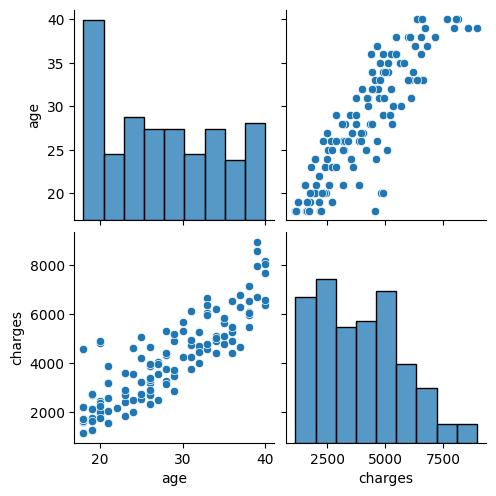

In [9]:
insurance_raw = insurance.copy()
insurance = insurance[['age', 'charges']]

sns.pairplot(data=insurance)

<ipython-input-10-f2f5267df7c7>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


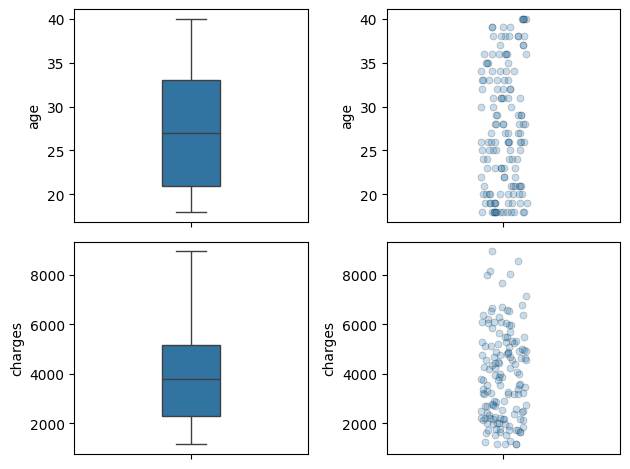

In [10]:
fig, ax = plt.subplots()
plt.subplot(2,2,1)
sns.boxplot(data=insurance, y='age', width=0.25)
plt.subplot(2,2,2)
sns.stripplot(data=insurance, y='age', alpha=0.25, linewidth=0.5, ec='k')
plt.subplot(2,2,3)
sns.boxplot(data=insurance, y='charges', width=0.25)
plt.subplot(2,2,4)
sns.stripplot(data=insurance, y='charges', alpha=0.25, linewidth=0.5, ec='k')
plt.tight_layout();

### **Separando os dados em treino/teste**

```python
X_train, X_test, y_train, y_test = train_test_split(
   x,
   y,
   test_size=0.2,
   random_state=42
)
```

In [11]:
# dados de treino e teste:
x_train, x_test, y_train, y_test = train_test_split(
    insurance[['age']],
    insurance['charges'],
    test_size=0.25,
    random_state=40
)

# Resultado:
print(f'X treino: {x_train.shape}')
print(f'Y treino: {y_train.shape}')
print(f'X teste: {x_test.shape}')
print(f'Y teste: {y_test.shape}')

X treino: (107, 1)
Y treino: (107,)
X teste: (36, 1)
Y teste: (36,)


### **Normalização**

Utilizada pois é preciso lidar, muitas vezes, com escalas diferentes. Logo, é interessante padronizar, podendo utilizar:

> **Máximo/Mínimo** (MinMaxScaler)

\begin{equation}
  x' = \frac{x - x_{min}}{x_{max} - x_{min}}
\end{equation}

Onde:

- $x'$: valor normalizado
- $x$: valor original
- $x_{min}$: valor mínimo de x
- $x_{max}$: valor máximo de x

<br>

> **Média e desvio padrão** (StandardScaler)

\begin{equation}
  z = \frac{x - \mu}{\sigma}
\end{equation}

Onde:

- $z$: valor normalizado
- $x$: valor original
- $\mu$: média
- $\sigma$: desvio padrão


> No Python:

Opção manual
```python
# função lambda:
insurance['col_std'] =  insurance['col'].apply(
    lambda x: (x - insurance['col'].mean()) / insurance['col'].std()
)
```
Scikit-Learn
```python
# bibliotecas
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar o StandardScaler à coluna 'col'
dados['col_std'] = scaler.fit_transform(dados[['col']])


```

In [12]:
# modelagem:
model_LR = LinearRegression()
model_LR = model_LR.fit(x_train, y_train)

In [13]:
# Resumo:
model_LR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['age'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([234.6945389]),
 'rank_': 1,
 'singular_': array([73.59246203]),
 'intercept_': -2487.7030871509046}

In [14]:
insurance['predict'] = model_LR.intercept_ + insurance['age']*model_LR.coef_
insurance['error'] = insurance['charges'] - insurance['predict']
insurance.head()

,age,charges,predict,error
0,18,1720.35370,1736.798613,-16.444913
1,34,6196.44800,5491.911235,704.536765
2,33,6653.78860,5257.216696,1396.571904
3,23,3597.59600,2910.271307,687.324693
4,26,3201.24515,3614.354924,-413.109774


### **Métricas de validação**

> **Erro Quadrático Médio (MSE)**

O MSE mede a média dos quadrados dos erros, penalizando mais fortemente grandes erros.

\begin{equation}
    \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{equation}

Valores menores indicam previsões mais precisas, mas pode ser influenciado por outliers.

> **Erro Médio Absoluto (MAE)**
O MAE mede a média dos valores absolutos dos erros, sendo menos sensível a outliers.

\begin{equation}
  \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
\end{equation}

Valores menores indicam previsões mais precisas, com menos influência de outliers.

> **Coeficiente de Determinação (R²)**
Mede a proporção da variabilidade dos dados explicada pelo modelo, variando de 0 a 1.

\begin{equation}
  R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\end{equation}   

Valores mais próximos de 1 indicam um melhor ajuste do modelo aos dados.


In [15]:
pred_train = model_LR.predict(x_train)
pred_test = model_LR.predict(x_test)

#treino:
r2_train = m.r2_score(y_train, pred_train)
mae_train = m.mean_absolute_error(y_train, pred_train)
rmse_train = np.sqrt(m.mean_squared_error(y_train, pred_train))

#teste:
r2_test= m.r2_score(y_test, pred_test)
mae_test = m.mean_absolute_error(y_test, pred_test)
rmse_test = np.sqrt(m.mean_squared_error(y_test, pred_test))

metrics = {
'Dados': ['Treino','Teste'],
'R²': [r2_train, r2_test],
'MAE': [mae_train, mae_test],
'RMSE': [rmse_train, rmse_test]
}

metrics = pd.DataFrame(metrics)
metrics

,Dados,R²,MAE,RMSE
0,Treino,0.784118,678.358184,876.115705
1,Teste,0.760678,613.502870,737.371121


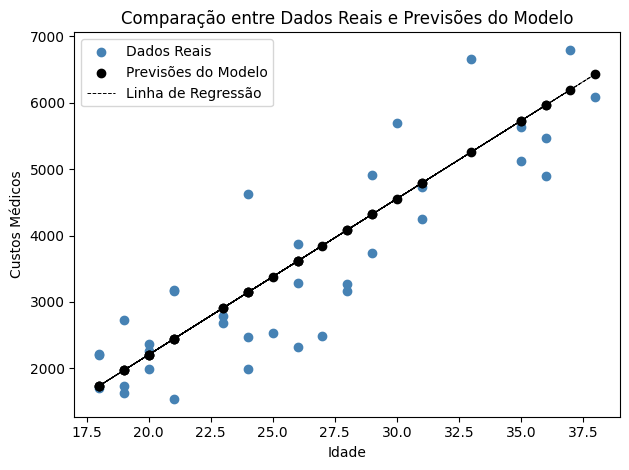

In [16]:
# Plotar os pontos de dados reais
plt.scatter(x_test, y_test, color='steelblue', label='Dados Reais')

# Plotar os valores previstos pelo modelo
plt.scatter(x_test, pred_test, color='black', label='Previsões do Modelo')

# Plotar a linha de regressão
plt.plot(x_test, pred_test, color='black', linestyle='dashed', lw=0.7, label='Linha de Regressão')

# Configurações do gráfico
plt.title('Comparação entre Dados Reais e Previsões do Modelo')
plt.xlabel('Idade')
plt.ylabel('Custos Médicos')
plt.legend()
plt.tight_layout()

## **Regressão Linear Múltipla**

In [17]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/insurance.csv' -O 'insurance.csv'

In [18]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


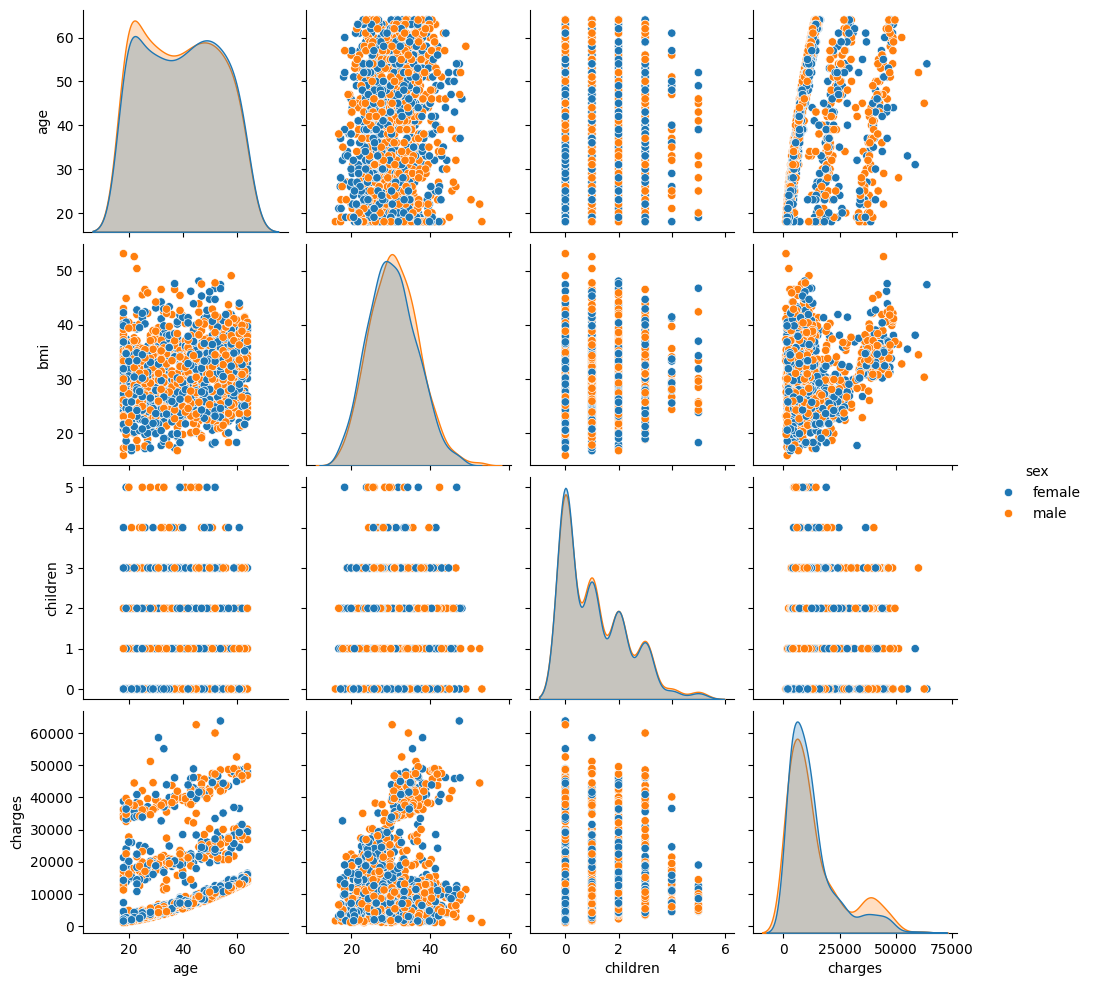

In [19]:
sns.pairplot(data=insurance, hue='sex')

In [20]:
 x = insurance.drop(['charges'], axis=1)
 y = insurance[['charges']]

# dados de treino e teste:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.3,
    random_state=40
)

# Resultado:
print(f'X treino: {x_train.shape}')
print(f'Y treino: {y_train.shape}')
print(f'X teste: {x_test.shape}')
print(f'Y teste: {y_test.shape}')

X treino: (936, 6)
Y treino: (936, 1)
X teste: (402, 6)
Y teste: (402, 1)


In [21]:
# Encoding:
x_train = pd.get_dummies(x_train, columns = ['sex', 'smoker', 'region'])
x_train = x_train.replace(True, 1).replace(False, 0)

# Encoding:
x_test = pd.get_dummies(x_test, columns = ['sex', 'smoker', 'region'])
x_test= x_test.replace(True, 1).replace(False, 0)

x_train.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
318,44,27.645,0,1,0,1,0,0,1,0,0
336,60,25.740,0,0,1,1,0,0,0,1,0


In [22]:
# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar o StandardScaler à coluna 'col' (treino)
x_train['age'] = scaler.fit_transform(x_train[['age']])
x_train['bmi'] = scaler.fit_transform(x_train[['bmi']])
x_train['children'] = scaler.fit_transform(x_train[['children']])

# Aplicar o StandardScaler à coluna 'col' (teste)
x_test['age'] = scaler.fit_transform(x_test[['age']])
x_test['bmi'] = scaler.fit_transform(x_test[['bmi']])
x_test['children'] = scaler.fit_transform(x_test[['children']])

x_train.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
318,0.328573,-0.506045,-0.912441,1,0,1,0,0,1,0,0
336,1.467361,-0.825841,-0.912441,0,1,1,0,0,0,1,0


In [23]:
model_MLR = LinearRegression()
model_MLR = model_MLR.fit(x_train, y_train)
model_MLR.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
        'smoker_yes', 'region_northeast', 'region_northwest',
        'region_southeast', 'region_southwest'], dtype=object),
 'n_features_in_': 11,
 'coef_': array([[ 3.69492228e+03,  1.92863160e+03,  6.95237260e+02,
          2.13426268e+01, -2.13426268e+01, -1.19465441e+04,
          1.19465441e+04,  5.72631876e+02, -2.42167729e+02,
         -1.01320957e+01, -3.20332052e+02]]),
 'rank_': 8,
 'singular_': array([3.27596900e+01, 3.06269001e+01, 2.87853761e+01, 2.15902317e+01,
        1.76456313e+01, 1.52025389e+01, 1.50100188e+01, 1.45754029e+01,
        3.72710755e-15, 2.40475527e-15, 1.18027144e-15]),
 'intercept_': array([20367.96507883])}

In [24]:
pred_train = model_MLR.predict(x_train)
pred_test = model_MLR.predict(x_test)

#treino:
r2_train = m.r2_score(y_train, pred_train)
mae_train = m.mean_absolute_error(y_train, pred_train)
rmse_train = np.sqrt(m.mean_squared_error(y_train, pred_train))

#teste:
r2_test = m.r2_score(y_test, pred_test)
mae_teste= m.mean_absolute_error(y_test, pred_test)
rmse_test = np.sqrt(m.mean_squared_error(y_test, pred_test))

metrics = {
'Dados': ['Treino','Teste'],
'R²': [r2_train, r2_test],
'MAE': [mae_train, mae_test],
'RMSE': [rmse_train, rmse_test]
}

metrics = pd.DataFrame(metrics)
metrics

,Dados,R²,MAE,RMSE
0,Treino,0.763519,4078.167085,5951.581441
1,Teste,0.715693,613.502870,6283.397471


In [25]:
x_test.columns

Index(['age', 'bmi', 'children', 'sex_female', 'sex_male', 'smoker_no',
       'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [26]:
age = 30
bmi = 25
children = 2
sex_female = 0
sex_male = 1
smoker_no = 0
smoker_yes = 1
region_northeast = 1
region_northwest	= 0
region_southeast = 0
region_southwest = 0

# Normalizando idade e BMI:
age_std = ( age - insurance['age'].mean()) / insurance['age'].std()
bmi_std = ( bmi - insurance['bmi'].mean()) / insurance['bmi'].std()
children_std = ( children - insurance['children'].mean()) / insurance['children'].std()

# Criando um array para predição:
patient = np.array([
    age_std, bmi_std, children_std, sex_female, sex_male,
    smoker_no, smoker_yes, region_northeast,
    region_northwest, region_southeast,
    region_southwest
]).reshape(1, -1)

# Predição
prediction_patient_n =  model_MLR.predict(patient)
print(f'Charges: {prediction_patient_n[0]} USD\n')

Charges: [29175.35270709] USD



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### **Validação cruzada**

Documentação scikit learn: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

```python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(modelo, features, target, num_folds, scoring)
```

> *Scoring* para regressão:

-  neg_mean_squared_error
- neg_mean_absolute_error
- r2

> *Scoring* para calssificação:

-  accuracy
-  precision
- recall
- f1
- roc_auc
- average_precision

> *Scoring* para clusterização:

-  adjusted_rand_score
-  normalized_mutual_info_score

In [27]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_MLR, x_test, y_test, cv=5, scoring='neg_mean_squared_error')

# Converte o erro quadrático médio negativo para erro quadrático médio
mse_scores = -scores

# Calcula o RMSE
rmse_scores = np.sqrt(mse_scores)

# Imprime cada score de RMSE
for score in rmse_scores:
    print("RMSE score:", score)

print("\nMédia:", rmse_scores.mean())
print("Desvio padrão:", rmse_scores.std())

RMSE score: 7371.295245302543
RMSE score: 6892.298126716376
RMSE score: 5348.1105429595455
RMSE score: 6018.4349919460965
RMSE score: 6241.445058602222

Média: 6374.316793105357
Desvio padrão: 701.3810260022017


In [28]:
# Métrica: R²
r2 = cross_val_score(model_MLR, x_test, y_test, cv=5, scoring='r2')

# Imprime cada score de R²:
for score in r2:
    print("RMSE score:", score)

print("\nMédia:", r2.mean())
print("Desvio padrão:", r2.std())

RMSE score: 0.4969708590430827
RMSE score: 0.7391839416415531
RMSE score: 0.8178639990121455
RMSE score: 0.7266260832075327
RMSE score: 0.6441606437940388

Média: 0.6849611053396706
Desvio padrão: 0.10894427554383544


## **Case: tratamento de nulos com KNN**

> **K-Nearest Neighborhood (funcionamento)**

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/knn-working.png?raw=true" width="600px"/>

Fonte: https://www.theclickreader.com/k-nearest-neighbours-knn-classifier/

<br>

> **Distâncias:**

<img src="https://github.com/OviedoVR/ML_especializacao/blob/main/assets/dist%C3%A2ncias-knn.png?raw=true" width="500px"/>


<br>

> **No Python:**

```python
# Bibliotecas:
from sklearn.impute import KNNImputer

# Inicializando o imputter KNN:
imputer = KNNImputer(n_neighbors=3)

# backup da coluna original
dados['col_raw'] = dados['col']
# coluna preenchida
dados['col'] = imputer.fit_transform(dados[['col_raw']])

# Visualização:
fig, ax = plt.subplots(figsize=(8,5));
plt.subplot(1,2,1);
sns.histplot(dados['col_raw']);
plt.subplot(1,2,2);
plt.tight_layout();
```

dados: [Zillow](https://www.zillow.com/fl/?searchQueryState=%7B%22pagination%22%3A%7B%7D%2C%22isMapVisible%22%3Atrue%2C%22mapBounds%22%3A%7B%22north%22%3A32.47917230710611%2C%22south%22%3A22.803517379980075%2C%22east%22%3A-77.22379045312502%2C%22west%22%3A-90.38541154687502%7D%2C%22filterState%22%3A%7B%22sort%22%3A%7B%22value%22%3A%22globalrelevanceex%22%7D%2C%22ah%22%3A%7B%22value%22%3Atrue%7D%7D%2C%22isListVisible%22%3Atrue%2C%22mapZoom%22%3A6%2C%22usersSearchTerm%22%3A%22FL%22%2C%22regionSelection%22%3A%5B%7B%22regionId%22%3A14%2C%22regionType%22%3A2%7D%5D%7D) - extraídos via API


> **PROBLEMA DE NEGÓCIO:** extraiu-se os dados de imóveis disponíveis para venda na plataforma Zillow (situada nos EUA) e se deseja utilizar esses dados para análises posteriores visando encontrar oportunidades (e.g., preço atrativo, boa localidade, rentabilidade pensando em locação, etc) ou, ainda, desenvolver um modelo de ML para agrupar imóveis com mesmas características. No entanto, a coluna `Rent Zestimate` (estimativa de aluguel informada pela própria Zillow) contém dados nulos e foi apontada como importante para os próximos passos do projeto. Assim, é necessário utilizar uma técnica de inputting que não afete consideravelemnte ou distorça a distribuição dos dados originais.

In [29]:
!wget -q 'https://raw.githubusercontent.com/OviedoVR/ML_especializacao/main/dados/Florida_listings.csv' -O 'Florida_listings.csv'

In [30]:
real_estate = pd.read_csv('Florida_listings.csv')
real_estate.head(2)

,rowid,zpid,Status Type,Status Text,Time On Zillow,Price,Area,Price Per Sqft,Zestimate,Zestimate Price Per Sqft,...,Bathrooms,Address,Street,City,Zipcode,Latitude,Longitude,Broker Name,Detail URL,Search Page URL
0,0,43811944,FOR_SALE,House for sale,NaN,389900,1631,239,NaN,NaN,...,2,"1331 NW 50th St, Miami, FL 33142",1331 NW 50th St,Miami,33142,"25,821117","-80,21888","Elite Realty Partners, Inc.",https://www.zillow.com/homedetails/1331-NW-50t...,https://www.zillow.com/miami-fl/2_p/?searchQue...
1,1,44162667,FOR_SALE,House for sale,4 days,350000,1924,182,334782.0,174.0,...,2,"2978 NW 28th St, Miami, FL 33142",2978 NW 28th St,Miami,33142,"25,8013","-80,24356",Sea Grove Realty,https://www.zillow.com/homedetails/2978-NW-28t...,https://www.zillow.com/miami-fl/2_p/?searchQue...


**Dicionário de dados**

| Field          | Description                                                   |
|----------------|---------------------------------------------------------------|
| zpid           | ID único de cada imóvel na Zillow                             |
| Price          | Preço do imóvel                                               |
| Rent Zestimate | Estimativa do valor do aluguel (estimado pela própria Zillow) |

In [31]:
real_estate = real_estate[['zpid', 'Price', 'Rent Zestimate']]
real_estate.head()

,zpid,Price,Rent Zestimate
0,43811944,389900,NaN
1,44162667,350000,3599.0
2,44333128,375000,2057.0
3,43847151,240000,1082.0
4,44362762,389000,NaN


In [32]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   zpid            75 non-null     int64  
 1   Price           75 non-null     int64  
 2   Rent Zestimate  57 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.9 KB


In [33]:
real_estate.isna().sum()

zpid               0
Price              0
Rent Zestimate    18
dtype: int64

In [34]:
# preencher esses dados ausentes:


<ipython-input-35-aff071545ec9>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1);


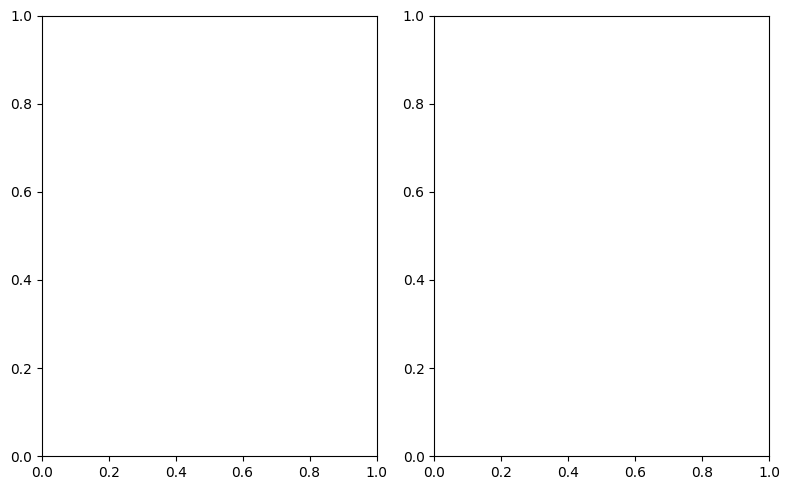

In [35]:
# Visualização:
fig, ax = plt.subplots(figsize=(8,5));
plt.subplot(1,2,1);
#sns.histplot(real_estate['_raw']);
plt.subplot(1,2,2);
#sns.histplot(real_estate['_fill']);
plt.tight_layout();

In [36]:
# Estatísticas descritivas:

In [37]:
# Estatísticas descritivas: